# IA PROJECT 2: LOAN APPROVAL

## Loan Dataset Features

| Variable                         | Description                                                                                 | Data Type     |
|----------------------------------|---------------------------------------------------------------------------------------------|---------------|
| `person_age`                     | Person's age                                                                                | Float         |
| `person_gender`                  | Person's gender                                                                             | Categorical   |
| `person_education`              | Highest education level                                                                     | Categorical   |
| `person_income`                  | Annual income                                                                              | Float         |
| `person_emp_exp`                 | Years of work experience                                                                   | Integer       |
| `person_home_ownership`          | Home ownership status (e.g., rent, own, mortgage)                                          | Categorical   |
| `loan_amnt`                      | Requested loan amount                                                                      | Float         |
| `loan_intent`                    | Loan purpose                                                                               | Categorical   |
| `loan_int_rate`                  | Loan interest rate                                                                         | Float         |
| `loan_percent_income`            | Loan amount as a percentage of annual income                                               | Float         |
| `cb_person_cred_hist_length`     | Length of credit history in years                                                          | Float         |
| `credit_score`                   | Person's credit score (The higher the score, the lower the assumed risk of default)        | Integer       |
| `previous_loan_defaults_on_file` | Indicator of previous loan defaults                                                        | Categorical   |
| `loan_status` (label)           | Loan approval status: 1 = approved; 0 = rejected                                            | Integer       |

For this dataset, we can address both a regression problem—predicting the `credit_score` —and a classification problem using the `loan_status` feature to determine whether the loan will be approved or not.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
df = pd.read_csv('dataset.csv')
df.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df.info()

No nulls in the dataset

In [ ]:
df.describe()

In [ ]:
df['loan_status'].value_counts()

In [3]:
df[df['loan_status'] == 1].sample(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
18295,33.0,female,Master,96759.0,9,RENT,21600.0,EDUCATION,18.64,0.22,10.0,640,No,1
13528,24.0,male,High School,65717.0,0,RENT,12500.0,VENTURE,14.50,0.19,4.0,613,No,1
19939,35.0,male,Associate,38010.0,11,MORTGAGE,8875.0,PERSONAL,11.99,0.23,7.0,660,No,1
25456,29.0,male,High School,75511.0,7,MORTGAGE,3600.0,MEDICAL,17.99,0.05,9.0,648,No,1
44089,22.0,male,Associate,15307.0,0,RENT,4146.0,MEDICAL,13.57,0.27,4.0,661,No,1
7446,22.0,male,Bachelor,34173.0,0,RENT,6700.0,VENTURE,15.31,0.20,3.0,696,No,1
3700,21.0,male,Associate,24064.0,0,RENT,4000.0,EDUCATION,14.35,0.17,3.0,633,No,1
9672,24.0,male,Associate,69465.0,2,MORTGAGE,6500.0,MEDICAL,13.04,0.09,4.0,635,No,1
973,24.0,female,High School,52304.0,0,RENT,18000.0,DEBTCONSOLIDATION,11.03,0.34,2.0,487,No,1
42260,32.0,male,Associate,92967.0,10,MORTGAGE,15000.0,DEBTCONSOLIDATION,11.30,0.16,6.0,601,No,1


In [ ]:
import pandas as pd

# Identificar las columnas categóricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Mostrar los valores únicos para cada columna categórica
for col in categorical_cols:
    print(f"📌 Unique values for '{col}':")
    print(df[col].unique())
    print("-" * 50)


In [47]:
import pandas as pd

# Identificar las columnas categóricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Mostrar los valores únicos para cada columna categórica
for col in categorical_cols:
    print(f"📌 Unique values for '{col}':")
    print(df[col].unique())
    print("-" * 50)


📌 Unique values for 'person_gender':
['female' 'male']
--------------------------------------------------
📌 Unique values for 'person_education':
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
--------------------------------------------------
📌 Unique values for 'person_home_ownership':
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
--------------------------------------------------
📌 Unique values for 'loan_intent':
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
--------------------------------------------------
📌 Unique values for 'previous_loan_defaults_on_file':
['No' 'Yes']
--------------------------------------------------


It can be observed that the label in our dataset is imbalanced.

In [ ]:
# Select numeric columns, excluding 'loan_status'
numeric_cols = [col for col in df.select_dtypes(include=['number']).columns if col != 'loan_status']

# 1. Boxplots for numeric variables (excluding 'loan_status')
for col in numeric_cols:
    plt.figure(figsize=(4, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# 2. Bar charts for categorical variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(4, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Frequency of {col}")
    plt.ylabel("Count")
    plt.show()

## BASIC ANN MODEL WITHOUT CLEANING DATASET (ONLY NaNs)

### Pre-process the data

In [4]:
# Import libraries
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torchsummary import summary

import numpy as np
import matplotlib.pyplot as plt

In [5]:
# set random seed for reproducibility
torch.manual_seed(42)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle

# 'loan_status' is the target column
y = df["loan_status"]
X = df.drop(["loan_status"], axis=1)

# Encode categorical columns 
categorical_cols = X.select_dtypes(include=["object", "category"]).columns

label_encoders = {}  # 📌 Guardaremos los LabelEncoders
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le  # Guardamos el encoder para usarlo en inferencia

# Guardar LabelEncoders para la inferencia 📌
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

print("✅ LabelEncoders guardados correctamente.")

# Convert to numpy arrays
X = X.values
y = y.values


# Split the data into train, val, and test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

# 📌 Aplicamos StandardScaler SOLO en el entrenamiento y guardamos el modelo para inferencia
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Guardar StandardScaler para la inferencia 📌
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ StandardScaler guardado correctamente.")

# Convert numpy arrays to PyTorch tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

X_val_t = torch.tensor(X_val, dtype=torch.float32)
y_val_t = torch.tensor(y_val, dtype=torch.float32)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(X_train_t, y_train_t)
val_dataset = TensorDataset(X_val_t, y_val_t)
test_dataset = TensorDataset(X_test_t, y_test_t)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

✅ LabelEncoders guardados correctamente.
✅ StandardScaler guardado correctamente.


### Design the network

In [7]:
class LoanApprovalANN(nn.Module):
    def __init__(self, input_size):
        super(LoanApprovalANN, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),  # First hidden layer (input -> 64)
            nn.ReLU(),
            nn.Linear(128, 64),  # Second hidden layer (64 -> 32)
            nn.ReLU(),
            nn.Linear(64,32),  # Output layer (32 -> 1)
            nn.ReLU(),
            nn.Linear(32,1),  # Output layer (32 -> 1)
            nn.Sigmoid()  # Activation for binary classification
        )

    def forward(self, x):
        return self.model(x)


### Initialize the model

In [8]:
input_size = X_train_t.shape[1]  # Number of features
model = LoanApprovalANN(input_size)



In [9]:
print(input_size)
train_loader.dataset.tensors[0].shape[1]

13


13

In [10]:
# Model summary
summary(model, (input_size,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]           1,792
              ReLU-2                  [-1, 128]               0
            Linear-3                   [-1, 64]           8,256
              ReLU-4                   [-1, 64]               0
            Linear-5                   [-1, 32]           2,080
              ReLU-6                   [-1, 32]               0
            Linear-7                    [-1, 1]              33
           Sigmoid-8                    [-1, 1]               0
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.05
Estimated Total Size (MB): 0.05
----------------------------------------------------------------


In [11]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

LoanApprovalANN(
  (model): Sequential(
    (0): Linear(in_features=13, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

In [12]:
import torch.optim as optim

# Define loss function
criterion = nn.BCELoss()  # Binary Cross Entropy Loss

# Define optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=0.01)


### Train the network

In [13]:
import torch

# Define device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Store training history
train_loss_history = []
valid_loss_history = []
train_accuracy_history = []
valid_accuracy_history = []

# Number of epochs
num_epochs = 25

def get_accuracy(preds, labels):
    """Calculate accuracy given model predictions and actual labels."""
    preds = (preds >= 0.5).float()  # Convert to binary values (0 or 1)
    return (preds == labels).sum().item() / labels.size(0)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    for i, (X_batch, y_batch) in enumerate(train_loader):

        # Move data to device
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Clear gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(X_batch).squeeze()

        # Compute loss
        loss = criterion(y_pred, y_batch)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

    # Calculate accuracy & loss for training and validation
    train_loss = 0
    valid_loss = 0
    train_accuracy = 0
    valid_accuracy = 0

    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch).squeeze()
            train_loss += criterion(y_pred, y_batch).item()
            train_accuracy += get_accuracy(y_pred, y_batch)

        train_loss_history.append(train_loss / len(train_loader))
        train_accuracy_history.append(train_accuracy / len(train_loader))

        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch).squeeze()
            valid_loss += criterion(y_pred, y_batch).item()
            valid_accuracy += get_accuracy(y_pred, y_batch)

        valid_loss_history.append(valid_loss / len(val_loader))
        valid_accuracy_history.append(valid_accuracy / len(val_loader))

    # Print epoch summary
    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train loss: {train_loss/len(train_loader):.3f} | "
          f"Train accuracy: {train_accuracy/len(train_loader):.3f} | "
          f"Valid loss: {valid_loss/len(val_loader):.3f} | "
          f"Valid accuracy: {valid_accuracy/len(val_loader):.3f}")



Epoch 1/25 | Train loss: 0.217 | Train accuracy: 0.903 | Valid loss: 0.213 | Valid accuracy: 0.900
Epoch 2/25 | Train loss: 0.201 | Train accuracy: 0.908 | Valid loss: 0.190 | Valid accuracy: 0.910
Epoch 3/25 | Train loss: 0.195 | Train accuracy: 0.911 | Valid loss: 0.190 | Valid accuracy: 0.909
Epoch 4/25 | Train loss: 0.196 | Train accuracy: 0.910 | Valid loss: 0.195 | Valid accuracy: 0.913
Epoch 5/25 | Train loss: 0.189 | Train accuracy: 0.913 | Valid loss: 0.186 | Valid accuracy: 0.914
Epoch 6/25 | Train loss: 0.189 | Train accuracy: 0.914 | Valid loss: 0.185 | Valid accuracy: 0.915
Epoch 7/25 | Train loss: 0.188 | Train accuracy: 0.914 | Valid loss: 0.186 | Valid accuracy: 0.914
Epoch 8/25 | Train loss: 0.193 | Train accuracy: 0.912 | Valid loss: 0.183 | Valid accuracy: 0.914
Epoch 9/25 | Train loss: 0.202 | Train accuracy: 0.908 | Valid loss: 0.202 | Valid accuracy: 0.907
Epoch 10/25 | Train loss: 0.188 | Train accuracy: 0.915 | Valid loss: 0.193 | Valid accuracy: 0.908
Epoch 11/

In [14]:
# Save the model
torch.save(model.state_dict(), "model.pth")


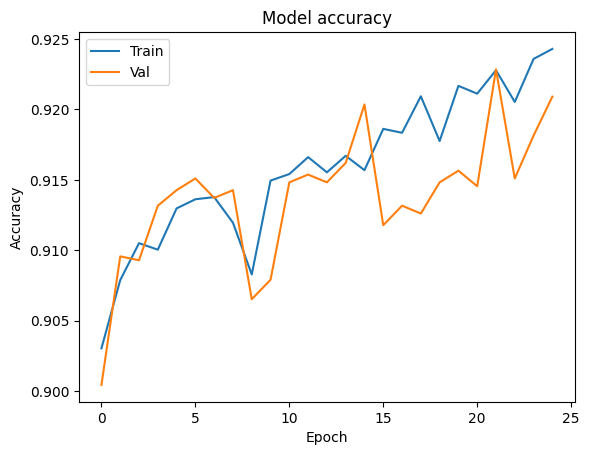

In [15]:
# Plot training and validation accuracy
plt.plot(train_accuracy_history)
plt.plot(valid_accuracy_history)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

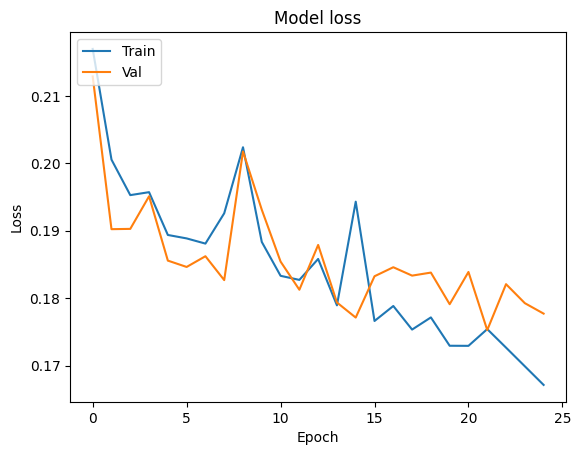

In [16]:
# Plot training and validation accuracy
plt.plot(train_loss_history)
plt.plot(valid_loss_history)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### Evaluate the model

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set model to evaluation mode
model.eval()

# Initialize variables for metrics
test_loss = 0.0
all_preds = []
all_labels = []

# No need to track gradients during evaluation
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        y_pred = model(X_batch).squeeze()

        # Compute loss
        loss = criterion(y_pred, y_batch)
        test_loss += loss.item()

        # Convert predictions to binary (0 or 1)
        predicted = (y_pred >= 0.5).float()

        # Store predictions and labels for metrics calculation
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

# Compute average test loss
avg_test_loss = test_loss / len(test_loader)

# Compute classification metrics
test_accuracy = accuracy_score(all_labels, all_preds)
test_precision = precision_score(all_labels, all_preds)
test_recall = recall_score(all_labels, all_preds)
test_f1 = f1_score(all_labels, all_preds)

# Print results
print(f"Test Loss: {avg_test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")


Test Loss: 0.1855
Test Accuracy: 0.9189
Test Precision: 0.8579
Test Recall: 0.7632
Test F1 Score: 0.8078


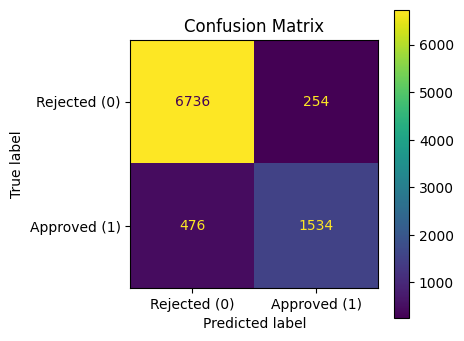

Accuracy for label 0 (Rejected): 96.37%
Accuracy for label 1 (Approved): 76.32%


In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Suponiendo que ya tienes tus predicciones y etiquetas verdaderas
# y_true = etiquetas reales (0 o 1)
# y_pred = predicciones del modelo (0 o 1)

# Calcula la matriz de confusión
cm = confusion_matrix(all_labels, all_preds)

# Visualiza la matriz de confusión
fig, ax = plt.subplots(figsize=(4, 4))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Rejected (0)", "Approved (1)"]).plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

# Extraer valores de la matriz de confusión
TN = cm[0, 0]  # True Negatives (0 correctamente predichos)
FP = cm[0, 1]  # False Positives (0 predichos como 1)
FN = cm[1, 0]  # False Negatives (1 predichos como 0)
TP = cm[1, 1]  # True Positives (1 correctamente predichos)

# Calcular el porcentaje de acierto para cada etiqueta
accuracy_0 = TN / (TN + FP) * 100  # Precisión para la etiqueta 0 (rechazado)
accuracy_1 = TP / (TP + FN) * 100  # Precisión para la etiqueta 1 (aprobado)

# Mostrar los resultados
print(f"Accuracy for label 0 (Rejected): {accuracy_0:.2f}%")
print(f"Accuracy for label 1 (Approved): {accuracy_1:.2f}%")

In [61]:
import pickle
import torch
import numpy as np
import pandas as pd

# Cargar el modelo
input_size = 13  # Ajusta este número según la cantidad de features en tu modelo
model = LoanApprovalANN(input_size)
model.load_state_dict(torch.load('model.pth', map_location=torch.device('cpu')))  # Cargar en CPU si no usas GPU
model.eval()

# Simulación de los datos ingresados por un usuario
sample_data = {
    "person_age": 70,  
    "person_gender": "male",
    "person_education": "Bachelor",
    "person_income": 1000,  
    "person_emp_exp": 1,  
    "person_home_ownership": "MORTGAGE",
    "loan_amnt": 150000,  
    "loan_intent": "VENTURE",
    "loan_int_rate": 3.0,  
    "loan_percent_income": 150000 / 24000,  
    "cb_person_cred_hist_length": 5,  
    "credit_score": 250,  
    "previous_loan_defaults_on_file": "No"
}

# Convertir el diccionario en un DataFrame
sample_df = pd.DataFrame([sample_data])

# 📌 1️⃣ Cargar los LabelEncoders entrenados

with open("label_encoders.pkl", "rb") as f:
    label_encoders = pickle.load(f)

# Aplicar Label Encoding a las variables categóricas
categorical_cols = ["person_gender", "person_education", "person_home_ownership", "loan_intent", "previous_loan_defaults_on_file"]
# print('-'*50)
# print(sample_df[col])
# print('-'*50)
# print(categorical_cols)
# print('-'*50)
for col in categorical_cols:
    if sample_df[col].values[0] not in label_encoders[col].classes_:
        print(f"⚠️ Advertencia: El valor '{sample_df[col].values[0]}' en {col} no estaba en los datos de entrenamiento.")
    
    sample_df[col] = label_encoders[col].transform(sample_df[col])



# 📌 2️⃣ Cargar el StandardScaler entrenado y aplicarlo a las variables numéricas
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# numerical_cols = ["person_age", "person_income", "person_emp_exp", "loan_amnt", 
#                   "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length", "credit_score", "person_gender", "person_education", "person_home_ownership", "loan_intent", "previous_loan_defaults_on_file"]

sample_df = scaler.transform(sample_df)


# 📌 3️⃣ Convertir los datos en un numpy array antes de pasarlo a PyTorch tensor
# input_array = sample_df.to_numpy(dtype=np.float32)  # Convertir DataFrame a NumPy array
input_array = np.array(sample_df, dtype=np.float32) 
# Convertir a un tensor de PyTorch
input_tensor = torch.tensor(input_array)

# 📌 4️⃣ Hacer la predicción
with torch.no_grad():
    output = model(input_tensor)
    prediction = (output >= 0.5).float().item()  # Convertir a 0 o 1

# 📌 5️⃣ Mostrar el resultado
if prediction == 1:
    print("✅ Loan Approved!")
else:
    print("❌ Loan Rejected!")


✅ Loan Approved!


C:\Users\eduab\AppData\Local\Temp\ipykernel_80020\123638449.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model.pth', map_location=to

# Exploratory Data Analysis

In [ ]:
# Correlation between features and label

from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric using LabelEncoder
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Compute correlation matrix again
correlation_matrix = df.corr()

# Extract correlation of each feature with 'loan_status'
correlation_with_target = correlation_matrix["loan_status"].drop("loan_status")

# Sort by absolute correlation value
correlation_with_target = correlation_with_target.abs().sort_values(ascending=False)

# Plot correlation as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette="Blues")
plt.xlabel("Correlation with Loan Status")
plt.ylabel("Features")
plt.title("Feature Correlation with Loan Status")
plt.grid(True)
plt.show()


In [ ]:
# BarChar comparing categorical features with label

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Plot bar charts for each categorical variable grouped by 'loan_status'
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], hue=df["loan_status"], palette="Blues")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Distribution of {col} by Loan Status")
    plt.xticks(rotation=45)
    plt.legend(title="Loan Status", labels=["Rejected (0)", "Approved (1)"])
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [ ]:
df.info()

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Create a dictionary to store proportions
category_proportions = {}

# Calculate proportions for each categorical variable
for col in categorical_cols:
    proportion_df = df.groupby([col, "loan_status"]).size().unstack(fill_value=0)  # Ensure all categories are included
    proportion_df = proportion_df.div(proportion_df.sum(axis=1), axis=0)  # Normalize to get proportions
    category_proportions[col] = proportion_df

# Display the proportions
for col, prop_df in category_proportions.items():
    print(f"Proportions of {col} by Loan Status:")
    print(prop_df)
    print("\n" + "-"*50 + "\n")


Conclusion:
* Gender, person_education, loan_intent aren´t important
* If you have a mortage or your own house is not probable to be given a loan
* If you have previous loan you wont get a loan

In [ ]:
# Identify numerical columns (excluding 'loan_status')
numerical_cols = df.select_dtypes(include=['number']).columns.drop("loan_status")

# Create boxplots for each numerical variable grouped by 'loan_status'
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df["loan_status"], y=df[col], palette="Blues")
    plt.xlabel("Loan Status")
    plt.ylabel(col)
    plt.title(f"Boxplot of {col} by Loan Status")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Conclusion:
* +80 age wont get a loan
* +1,2 income wont get a loan
* +55 years_experience wont get a loan

In [ ]:
# Drop columns that aren´t relevant
df.drop(columns=["person_gender", "person_education", "loan_intent"], inplace=True)

In [ ]:
# Apply one-hot encoding in 'person_home_ownership'
df = pd.get_dummies(df, columns=["person_home_ownership"], drop_first=True)

In [ ]:
# Change  Yes/No "previous_loan_defaults_on_file" columm to 1/0

# Ensure the column is numeric
df["previous_loan_defaults_on_file"] = df["previous_loan_defaults_on_file"].astype(str)

# Convert any non-zero or non-null value to 1
df["had_previous_loans"] = df["previous_loan_defaults_on_file"].apply(lambda x: 1 if x != "0" and x.lower() != "nan" else 0)

# Drop the original column
df.drop(columns=["previous_loan_defaults_on_file"], inplace=True)


In [ ]:
# Create binary features (Not sure if it will improve the model accuracy and precision)
df["age_80_plus"] = (df["person_age"] > 80).astype(int)
df["high_income"] = (df["person_income"] > 1.2e6).astype(int)
df["exp_55_plus"] = (df["person_emp_exp"] > 55).astype(int)


In [ ]:
df.sample(5)

In [ ]:
df.info()

# ANN MODEL WITH EDA

### Pre-process data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 'loan_status' is the target column
y = df["loan_status"]
X = df.drop(["loan_status"], axis=1)

# Encode categorical columns 
# categorical_cols = X.select_dtypes(include=["object", "category"]).columns
# for col in categorical_cols:
#     le = LabelEncoder()
#     X[col] = le.fit_transform(X[col].astype(str))


# Convert to numpy arrays
X = X.values
y = y.values

# Split the data into train, val, and test

# First split: test = 20%, train_val = 80%
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Second split: of the remaining 80%, 10% goes to val => 90% train, 10% val
# (10% of 80% is 8% total)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, 
    y_train_val,
    test_size=0.1,   # 10% of the remaining 80%
    random_state=42
)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# 4. Convert numpy arrays to PyTorch tensors

X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

X_val_t = torch.tensor(X_val, dtype=torch.float32)
y_val_t = torch.tensor(y_val, dtype=torch.float32)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)


# 5. Create TensorDatasets and DataLoaders

train_dataset = TensorDataset(X_train_t, y_train_t)
val_dataset   = TensorDataset(X_val_t, y_val_t)
test_dataset  = TensorDataset(X_test_t, y_test_t)

batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


### Design the network

In [ ]:
# class LoanApprovalANN(nn.Module):
#     def __init__(self, input_size):
#         super(LoanApprovalANN, self).__init__()
        
#         self.model = nn.Sequential(
#             nn.Linear(input_size, 128),  # First hidden layer (input -> 64)
#             nn.ReLU(),
#             nn.Linear(128, 64),  # Second hidden layer (64 -> 32)
#             nn.ReLU(),
#             nn.Linear(64,32),  # Output layer (32 -> 1)
#             nn.ReLU(),
#             nn.Linear(32,1),  # Output layer (32 -> 1)
#             nn.Sigmoid()  # Activation for binary classification
#         )

#     def forward(self, x):
#         return self.model(x)
import torch
import torch.nn as nn

class LoanApprovalANN(nn.Module):
    def __init__(self, input_size):
        super(LoanApprovalANN, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(input_size, 256),  # Primera capa oculta (input → 256 neuronas)
            nn.BatchNorm1d(256),  # Normalización para estabilizar el entrenamiento
            nn.ReLU(),
            nn.Dropout(0.2),  # Apaga el 30% de las neuronas en cada forward pass
            
            nn.Linear(256, 128),  # Segunda capa oculta (256 → 128 neuronas)
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(128, 64),  # Tercera capa oculta (128 → 64 neuronas)
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, 32),  # Cuarta capa oculta (64 → 32 neuronas)
            nn.ReLU(),

            nn.Linear(32, 1),  # Capa de salida (32 → 1 neurona)
            nn.Sigmoid()  # Activación Sigmoid para clasificación binaria
        )

    def forward(self, x):
        return self.model(x)


### Initialize the model



In [ ]:
input_size = X_train_t.shape[1]  # Number of features
model = LoanApprovalANN(input_size)


In [ ]:
# Model summary
summary(model, (input_size,))

In [ ]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [ ]:
import torch.optim as optim

# Define loss function
criterion = nn.BCELoss()  # Binary Cross Entropy Loss

# Define optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=0.01)

### Train the network

In [ ]:
import torch

# Define device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Store training history
train_loss_history = []
valid_loss_history = []
train_accuracy_history = []
valid_accuracy_history = []

# Number of epochs
num_epochs = 25

def get_accuracy(preds, labels):
    """Calculate accuracy given model predictions and actual labels."""
    preds = (preds >= 0.5).float()  # Convert to binary values (0 or 1)
    return (preds == labels).sum().item() / labels.size(0)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    for i, (X_batch, y_batch) in enumerate(train_loader):

        # Move data to device
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Clear gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(X_batch).squeeze()

        # Compute loss
        loss = criterion(y_pred, y_batch)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

    # Calculate accuracy & loss for training and validation
    train_loss = 0
    valid_loss = 0
    train_accuracy = 0
    valid_accuracy = 0

    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch).squeeze()
            train_loss += criterion(y_pred, y_batch).item()
            train_accuracy += get_accuracy(y_pred, y_batch)

        train_loss_history.append(train_loss / len(train_loader))
        train_accuracy_history.append(train_accuracy / len(train_loader))

        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch).squeeze()
            valid_loss += criterion(y_pred, y_batch).item()
            valid_accuracy += get_accuracy(y_pred, y_batch)

        valid_loss_history.append(valid_loss / len(val_loader))
        valid_accuracy_history.append(valid_accuracy / len(val_loader))

    # Print epoch summary
    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train loss: {train_loss/len(train_loader):.3f} | "
          f"Train accuracy: {train_accuracy/len(train_loader):.3f} | "
          f"Valid loss: {valid_loss/len(val_loader):.3f} | "
          f"Valid accuracy: {valid_accuracy/len(val_loader):.3f}")

In [ ]:
# Plot training and validation accuracy
plt.plot(train_accuracy_history)
plt.plot(valid_accuracy_history)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
# Plot training and validation accuracy
plt.plot(train_loss_history)
plt.plot(valid_loss_history)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### Evaluate the model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set model to evaluation mode
model.eval()

# Initialize variables for metrics
test_loss = 0.0
all_preds = []
all_labels = []

# No need to track gradients during evaluation
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        y_pred = model(X_batch).squeeze()

        # Compute loss
        loss = criterion(y_pred, y_batch)
        test_loss += loss.item()

        # Convert predictions to binary (0 or 1)
        predicted = (y_pred >= 0.5).float()

        # Store predictions and labels for metrics calculation
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

# Compute average test loss
avg_test_loss = test_loss / len(test_loader)

# Compute classification metrics
test_accuracy = accuracy_score(all_labels, all_preds)
test_precision = precision_score(all_labels, all_preds)
test_recall = recall_score(all_labels, all_preds)
test_f1 = f1_score(all_labels, all_preds)

# Print results
print(f"Test Loss: {avg_test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")